
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib.axis import YTick
import matplotlib.pyplot as plt

In [2]:
def exponencial_1(x,n):
  suma = 0
  for i in range(0,n+1,1):
    suma += ((x)**i)/mt.factorial(i)
  return suma

exp = exponencial_1(-1,100)
exp

0.36787944117144245

- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

In [3]:
def exponencial(x,Nmax = 1000):
  suma = 0
  i=0
  si = ((x)**i)/mt.factorial(i)
  while (abs(si) > abs(10**(-7)*suma)) & (i <= Nmax):
    suma += si
    i += 1
    si = ((x)**i)/mt.factorial(i)
  return suma, i-1

exp, n = exponencial(-0.5)
expEsperado = np.exp(-0.5)
print("Valor de N = ",n,", Valor obtenido = ", exp, ", valor Esperado = ", expEsperado)

Valor de N =  8 , Valor obtenido =  0.6065306648375496 , valor Esperado =  0.6065306597126334


- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

In [4]:
x = np.linspace(9.8,10.2,5)
x = -1*x
for xi in x:
  exp, n = exponencial(xi,9)
  exp = round(exp,7)
  expEsperado = np.exp(xi)
  expEsperado = round(expEsperado,7)
  print("Valor de x = ",xi,"Valor de N = ",n,", Valor obtenido = ", exp, ", valor Esperado = ", expEsperado)

Valor de x =  -9.8 Valor de N =  9 , Valor obtenido =  -1166.2852389 , valor Esperado =  5.55e-05
Valor de x =  -9.9 Valor de N =  9 , Valor obtenido =  -1284.4348908 , valor Esperado =  5.02e-05
Valor de x =  -10.0 Valor de N =  9 , Valor obtenido =  -1413.1446208 , valor Esperado =  4.54e-05
Valor de x =  -10.1 Valor de N =  9 , Valor obtenido =  -1553.2345849 , valor Esperado =  4.11e-05
Valor de x =  -10.2 Valor de N =  9 , Valor obtenido =  -1705.5791933 , valor Esperado =  3.72e-05


- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

In [5]:
x = np.linspace(9.8,10.2,5)
for xi in x:
  exp, n = exponencial(xi,9)
  exp = 1/exp
  exp = round(exp,7)
  expEsperado = np.exp(-1*xi)
  expEsperado = round(expEsperado,7)
  print("Valor de x = ",xi,"Valor de N = ",n,", Valor obtenido = ", exp, ", valor Esperado = ", expEsperado)

print("Se puede observar que la precisión aumenta usando la expresión 1/exp(x)")

Valor de x =  9.8 Valor de N =  9 , Valor obtenido =  0.0001148 , valor Esperado =  5.55e-05
Valor de x =  9.9 Valor de N =  9 , Valor obtenido =  0.0001066 , valor Esperado =  5.02e-05
Valor de x =  10.0 Valor de N =  9 , Valor obtenido =  9.91e-05 , valor Esperado =  4.54e-05
Valor de x =  10.1 Valor de N =  9 , Valor obtenido =  9.22e-05 , valor Esperado =  4.11e-05
Valor de x =  10.2 Valor de N =  9 , Valor obtenido =  8.58e-05 , valor Esperado =  3.72e-05
Se puede observar que la precisión aumenta usando la expresión 1/exp(x)


- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges



Se puede observar que con un N = 100 de 0 a 30 más o menos la ecuación se acerca bastante al valor esperado con un error de al rededor 10^-4,
 en 38 el error es de 0,015, para 39 es de 2.43 y apartir  de ahí va perdiendo precisión rápidamente, y para 40 se ha disparado a 54.8,
 en 50 tenemos errores del orden de 10^11, 
en 60 la impresición está por el orden de 10^19, para x = 70 el error asendió a 10^26, 
y llegando a 100 ya se está muy lejos del valor esperado más o menos de 5x10^41.


Se puede observar que con un N = 1000 de 0 a 30 más o menos la ecuación se acerca bastante al valor esperado,
 pero después de este el valor se va perdiendo precisión de 10^-4 y empieza a incrmentar rápidamente, 
en 40 ya la impresición es de más de 5, en 50 tenemos errores del orden de 25000 a 150000, 
en 60 la impresición está por el orden de 10^9, para x = 67 el error asendió a 10^12, 
a partir de x = 68 hasta x= 100 el error está muy lejos llegando a infinito según el sistema.y llegando a 100 ya 

<ipython-input-3-d582dcde4750>:8: RuntimeWarning: overflow encountered in double_scalars
  si = ((x)**i)/mt.factorial(i)


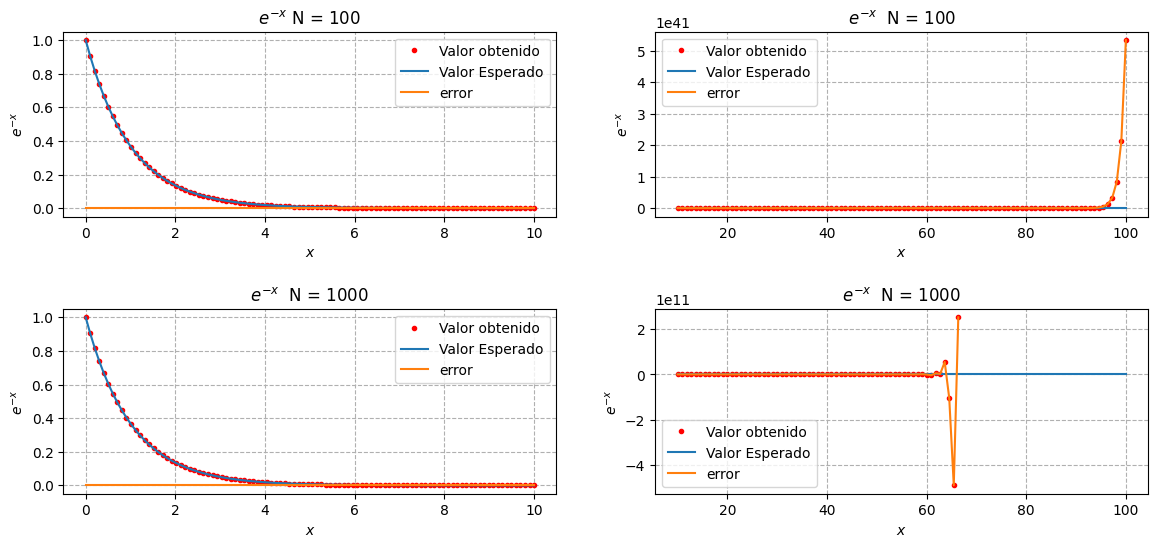

In [10]:
def get_valObtenido_valEsperado(x, Nmax = 1000):
  y = np.zeros(len(x))
  yEsperado = np.zeros(len(x))
  N = np.zeros(len(x))
  for i in np.arange(0,len(x),1):
    y[i], N[i] = exponencial(x[i], Nmax)
    yEsperado[i] = np.exp(x[i])
  return y, yEsperado, N

fig, axs = plt.subplots(2, 2,figsize=(14, 6))
fig.subplots_adjust(wspace=0.2, hspace=0.5)

x = np.linspace(0,10,100)
x = -1*x
y, yEsperado, N = get_valObtenido_valEsperado(x,100)
x = -1*x
y_error = y - yEsperado
axs[0,0].set_title("$e^{-x}$ N = 100")
axs[0,0].set_xlabel("$x$")
axs[0,0].set_ylabel("$e^{-x}$")
axs[0,0].plot(x,y, "r.", label="Valor obtenido")
axs[0,0].plot(x,yEsperado, label="Valor Esperado")
axs[0,0].plot(x,y_error, label="error")
axs[0,0].legend()
axs[0,0].grid(linestyle="--")


x = np.linspace(10,100,100)
x = -1*x
y, yEsperado, N = get_valObtenido_valEsperado(x,100)
x = -1*x
y_error = y - yEsperado
axs[0,1].set_title("$e^{-x}$  N = 100")
axs[0,1].set_xlabel("$x$")
axs[0,1].set_ylabel("$e^{-x}$")
axs[0,1].plot(x,y, "r.", label="Valor obtenido")
axs[0,1].plot(x,yEsperado, label="Valor Esperado")
axs[0,1].plot(x,y_error, label="error")
axs[0,1].legend()
axs[0,1].grid(linestyle="--")
print("")
print("")
print("Se puede observar que con un N = 100 de 0 a 30 más o menos la ecuación se acerca bastante al valor esperado con un error de al rededor 10^-4,")
print(" en 38 el error es de 0,015, para 39 es de 2.43 y apartir  de ahí va perdiendo precisión rápidamente, y para 40 se ha disparado a 54.8,")
print(" en 50 tenemos errores del orden de 10^11, ")
print("en 60 la impresición está por el orden de 10^19, para x = 70 el error asendió a 10^26, ")
print("y llegando a 100 ya se está muy lejos del valor esperado más o menos de 5x10^41.")

x = np.linspace(0,10,100)
x = -1*x
y, yEsperado, N = get_valObtenido_valEsperado(x)
x = -1*x
y_error = y - yEsperado
axs[1,0].set_title("$e^{-x}$  N = 1000")
axs[1,0].set_xlabel("$x$")
axs[1,0].set_ylabel("$e^{-x}$")
axs[1,0].plot(x, y, "r.", label="Valor obtenido")
axs[1,0].plot(x,yEsperado, label="Valor Esperado")
axs[1,0].plot(x,y_error, label="error")
axs[1,0].legend()
axs[1,0].grid(linestyle="--")

x = np.linspace(10,100,100)
x = -1*x
y, yEsperado, N = get_valObtenido_valEsperado(x)
x = -1*x
y_error = y - yEsperado
axs[1,1].set_title("$e^{-x}$  N = 1000")
axs[1,1].set_xlabel("$x$")
axs[1,1].set_ylabel("$e^{-x}$")
axs[1,1].plot(x,y, "r.", label="Valor obtenido")
axs[1,1].plot(x,yEsperado, label="Valor Esperado")
axs[1,1].plot(x,y_error, label="error")
axs[1,1].legend()
axs[1,1].grid(linestyle="--")
print("")
print("")
print("Se puede observar que con un N = 1000 de 0 a 30 más o menos la ecuación se acerca bastante al valor esperado,")
print(" pero después de este el valor se va perdiendo precisión de 10^-4 y empieza a incrmentar rápidamente, ")
print("en 40 ya la impresición es de más de 5, en 50 tenemos errores del orden de 25000 a 150000, ")
print("en 60 la impresición está por el orden de 10^9, para x = 67 el error asendió a 10^12, ")
print("a partir de x = 68 hasta x= 100 el error está muy lejos llegando a infinito según el sistema.y llegando a 100 ya se está muy lejos del valor esperado más o menos de 5x10^41.")


- Make a series of graphs of the error versus N for different values of x.

<ipython-input-4-d582dcde4750>:8: RuntimeWarning: overflow encountered in double_scalars
  si = ((x)**i)/mt.factorial(i)


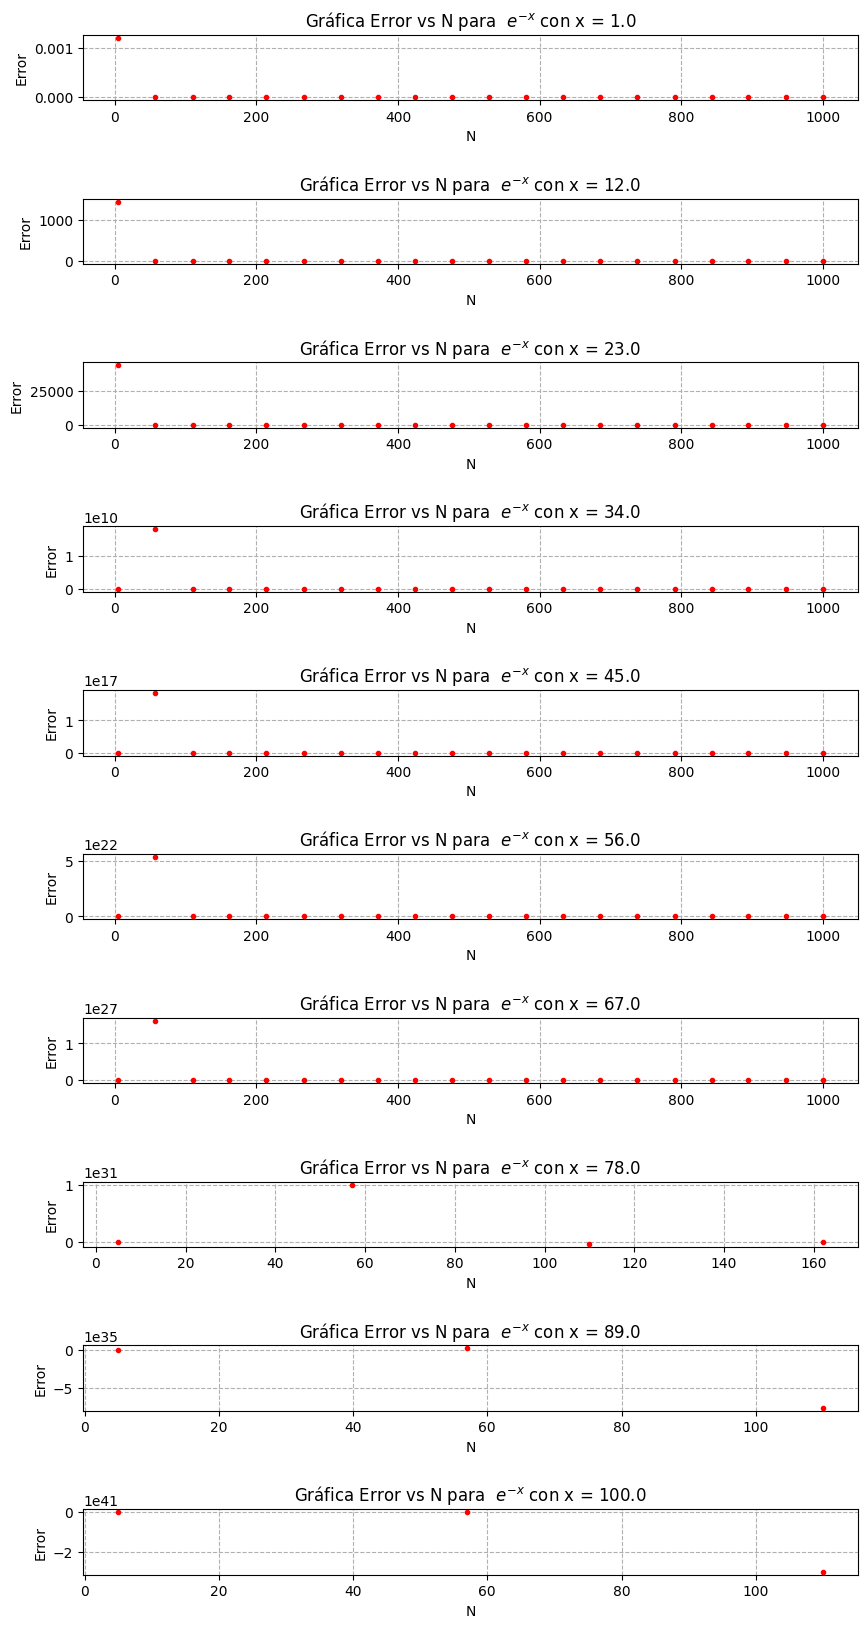

In [ ]:
n = np.linspace(5,1000,20)
n = n.round(0)
x = np.linspace(1,100,10)
x = -1*x
y_rest = np.zeros((len(n),len(x)))
i = 0
for n_ in n:
  y, yEsperado, N = get_valObtenido_valEsperado(x, n_)
  y_rest[i] = yEsperado - y
  i += 1

i = 0
fig, axs = plt.subplots(len(x), 1,figsize=(10, 20))
fig.subplots_adjust(wspace=2, hspace=1.5)
x = -1*x
for x_ in x:
  titulo = "Gráfica Error vs N para  $e^{-x}$ con x = " + str(x_)
  axs[i].set_title(titulo)
  axs[i].set_xlabel("N")
  axs[i].set_ylabel("Error")
  y_error = (y_rest[:,i:i+1]).flatten(order='F')
  axs[i].plot(n,y_error, "r.")
  axs[i].grid(linestyle="--")
  i += 1




## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.




del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.




- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$



In [ ]:
def sn_1(N):
  suma = 0
  for n in range(1,2*N+1,1):
    suma += ((-1)**n)*(n/(n+1))
  return suma

def sn_2(N):
  suma1 = 0
  suma2 = 0
  for n in range(1,N+1,1):
    suma1 += ((2*n)-1)/(2*n)
    suma1 += (2*n)/((2*n)-1)
  return (-1*suma1) + suma2

def sn_3(N):
  suma = 0
  for n in range(1,N+1,1):
    suma += 1/(2*n*((2*n)+1))
  return suma

- Estudiar la convergencia de la serie para los tres casos.

para N =  1 , Valores de la sumatoria s1 =  0.16666666666666663 , s2 =  -2.5 , s3 =  0.16666666666666666
para N =  5 , Valores de la sumatoria s1 =  0.2634559884559883 , s2 =  -10.64563492063492 , s3 =  0.26345598845598844
para N =  10 , Valores de la sumatoria s1 =  0.2836095492055243 , s2 =  -20.668771403175427 , s3 =  0.2836095492055244
para N =  20 , Valores de la sumatoria s1 =  0.29480637430486667 , s2 =  -40.680803381792686 , s3 =  0.2948063743048669
para N =  40 , Valores de la sumatoria s1 =  0.30071808097851327 , s2 =  -80.68693624000915 , s3 =  0.30071808097851377
para N =  80 , Valores de la sumatoria s1 =  0.30375687388155037 , s2 =  -160.69003194599426 , s3 =  0.3037568738815511


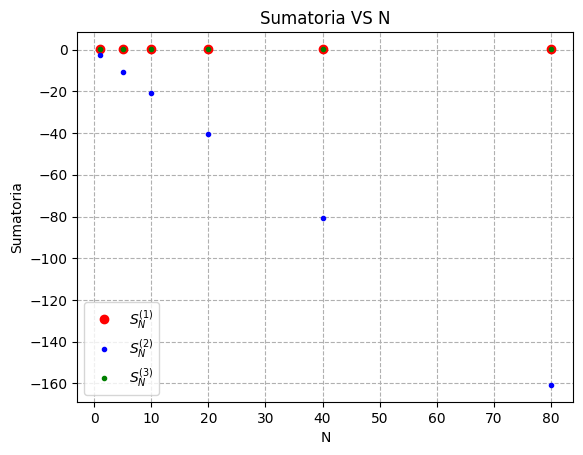

In [ ]:
plt.grid(linestyle="--")
plt.title("Sumatoria VS N")
plt.xlabel("N")
plt.ylabel("Sumatoria")

N = 1
s1 = sn_1(N)
s2 = sn_2(N)
s3 = sn_3(N)

print("para N = ",N, ", Valores de la sumatoria s1 = ", s1, ", s2 = ", s2, ", s3 = ", s3)
plt.plot(N,s1, "ro", label="$S_N^{(1)}$")
plt.plot(N,s2, "b.", label="$S_N^{(2)}$")
plt.plot(N,s3, "g.", label="$S_N^{(3)}$")
n = np.array([5,10, 20, 40, 80])
for N in n:
  s1 = sn_1(N)
  s2 = sn_2(N)
  s3 = sn_3(N)
  print("para N = ",N, ", Valores de la sumatoria s1 = ", s1, ", s2 = ", s2, ", s3 = ", s3)
  plt.plot(N,s1, "ro")
  plt.plot(N,s2, "b.")
  plt.plot(N,s3, "g.")
plt.legend()

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

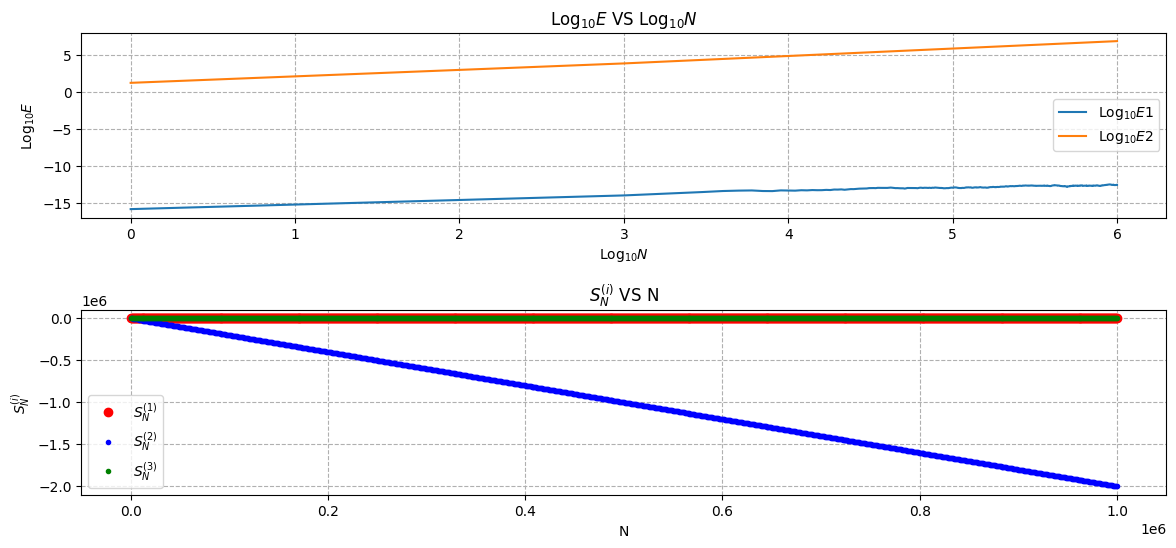

In [ ]:
N=10**6
N = np.linspace(1, 10**6, 1000)
s1 = np.zeros(len(N))
s2 = np.zeros(len(N))
s3 = np.zeros(len(N))
i = 0
for n in N:
  n = round(n)
  s1[i] = sn_1(n)
  s2[i] = sn_2(n)
  s3[i] = sn_3(n)
  i += 1

E1 = abs((s1-s3)/s3)
E2 = abs((s2-s3)/s3)
logE1 = np.log10(E1)
logE2 = np.log10(E2)
logN = np.log10(N)
fig, axs = plt.subplots(2, 1,figsize=(14, 6))
fig.subplots_adjust(wspace=0.2, hspace=0.5)

axs[0].set_title("$\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$")
axs[0].set_xlabel("$\mathrm{Log_{10}} N$")
axs[0].set_ylabel("$\mathrm{Log_{10}} E$")
axs[0].plot(logN,logE1,label="$\mathrm{Log_{10}} E1$")
axs[0].plot(logN,logE2,label="$\mathrm{Log_{10}} E2$")
axs[0].grid(linestyle="--")
axs[0].legend()
#print("para N = ",N, ", Valores de la sumatoria s1 = ", s1, ", s2 = ", s2, ", s3 = ", s3)
plt.plot(N,s1, "ro", label="$S_N^{(1)}$")
plt.plot(N,s2, "b.", label="$S_N^{(2)}$")
plt.plot(N,s3, "g.", label="$S_N^{(3)}$")
plt.title("$S_N^{(i)}$ VS N")
plt.xlabel("N")
plt.ylabel("$S_N^{(i)}$")
plt.legend()
plt.grid(linestyle="--")

para N =  1000000 , Valores de la sumatoria s1 =  0.3068525694401464 , s2 =  -2000000.693146924 , s3 =  0.306852569440241


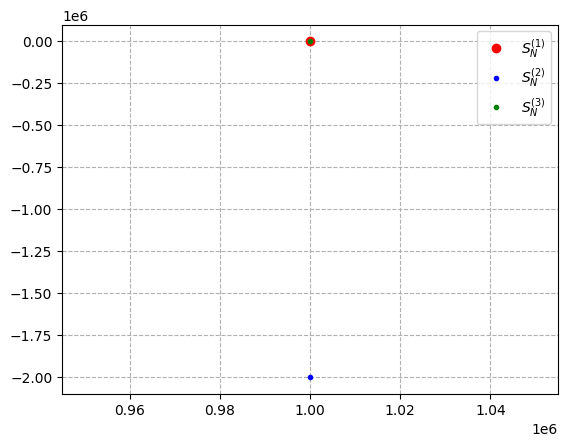

In [ ]:
N=10**6
s1 = sn_1(N)
s2 = sn_2(N)
s3 = sn_3(N)
print("para N = ",N, ", Valores de la sumatoria s1 = ", s1, ", s2 = ", s2, ", s3 = ", s3)
plt.plot(N,s1, "ro", label="$S_N^{(1)}$")
plt.plot(N,s2, "b.", label="$S_N^{(2)}$")
plt.plot(N,s3, "g.", label="$S_N^{(3)}$")
plt.legend()
plt.grid(linestyle="--")

- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
